In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import defaultdict
from sklearn.metrics import confusion_matrix

import data_loader
from model import NeuralNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# load data
data_set = data_loader.read_data_sets("./mnist/")

train = data_set.train
val = data_set.validation
test = data_set.test

x = train.images
y = train.labels
x_val = val.images
y_val = val.labels
x_test = test.images
y_test = test.labels

print(x.shape, y.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(55000, 784) (55000,)
(5000, 784) (5000,)
(10000, 784) (10000,)


In [3]:
# init model
input_size = 28 * 28
layer_size = 50
class_size = 10

In [4]:
# training - relu
np.random.seed(1)
net = NeuralNet(input_size, layer_size, class_size, is_relu=True)
stats = net.train(x, y, x_val, y_val, iters=300, batch_size=200, lr=1e-1, reg=1e-4)

iteration 0 / 300: loss 2.456356
iteration 10 / 300: loss 2.187066
iteration 20 / 300: loss 1.990760
iteration 30 / 300: loss 1.679872
iteration 40 / 300: loss 1.338710
iteration 50 / 300: loss 1.119119
iteration 60 / 300: loss 1.038451
iteration 70 / 300: loss 0.783408
iteration 80 / 300: loss 0.731611
iteration 90 / 300: loss 0.667425
iteration 100 / 300: loss 0.680347
iteration 110 / 300: loss 0.683733
iteration 120 / 300: loss 0.471493
iteration 130 / 300: loss 0.632810
iteration 140 / 300: loss 0.585651
iteration 150 / 300: loss 0.533855
iteration 160 / 300: loss 0.475687
iteration 170 / 300: loss 0.623714
iteration 180 / 300: loss 0.436592
iteration 190 / 300: loss 0.535950
iteration 200 / 300: loss 0.463949
iteration 210 / 300: loss 0.412666
iteration 220 / 300: loss 0.438433
iteration 230 / 300: loss 0.416506
iteration 240 / 300: loss 0.436376
iteration 250 / 300: loss 0.420660
iteration 260 / 300: loss 0.339404
iteration 270 / 300: loss 0.522954
iteration 280 / 300: loss 0.449

In [5]:
print("final training loss: ", stats['train_loss_graph'][-1])

final training loss:  0.48114382884780393


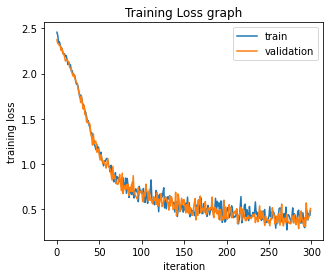

In [6]:
train_loss, = plt.plot(stats['train_loss_graph'], label='train')
val_loss, = plt.plot(stats['val_loss_graph'], label='validation')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss graph')
plt.legend(handles=[train_loss, val_loss], loc='upper right')
plt.show()

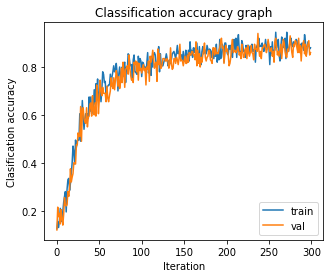

In [7]:
train_acc, = plt.plot(stats['train_acc_graph'], label='train')
val_acc, = plt.plot(stats['val_acc_graph'], label='val')
plt.title('Classification accuracy graph')
plt.xlabel('Iteration')
plt.ylabel('Clasification accuracy')
plt.legend(handles=[train_acc, val_acc], loc='lower right')
plt.show()

In [8]:
# test
test_pred, test_scores = net.predict(x_test)

In [9]:
# plot top-3 images with probability

scores_dict = defaultdict(list)
for i in range(len(test_pred)):
    scores_dict[test_pred[i]].append((test_scores[i], i))

# print(scores_dict)

top_3_dict = defaultdict(list)
for key in scores_dict.keys():
    values = scores_dict[key]
    values.sort(key=lambda x: x[0], reverse=True)
    top_3_dict[key].extend(values[:3])

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 70.0) # set size of plots

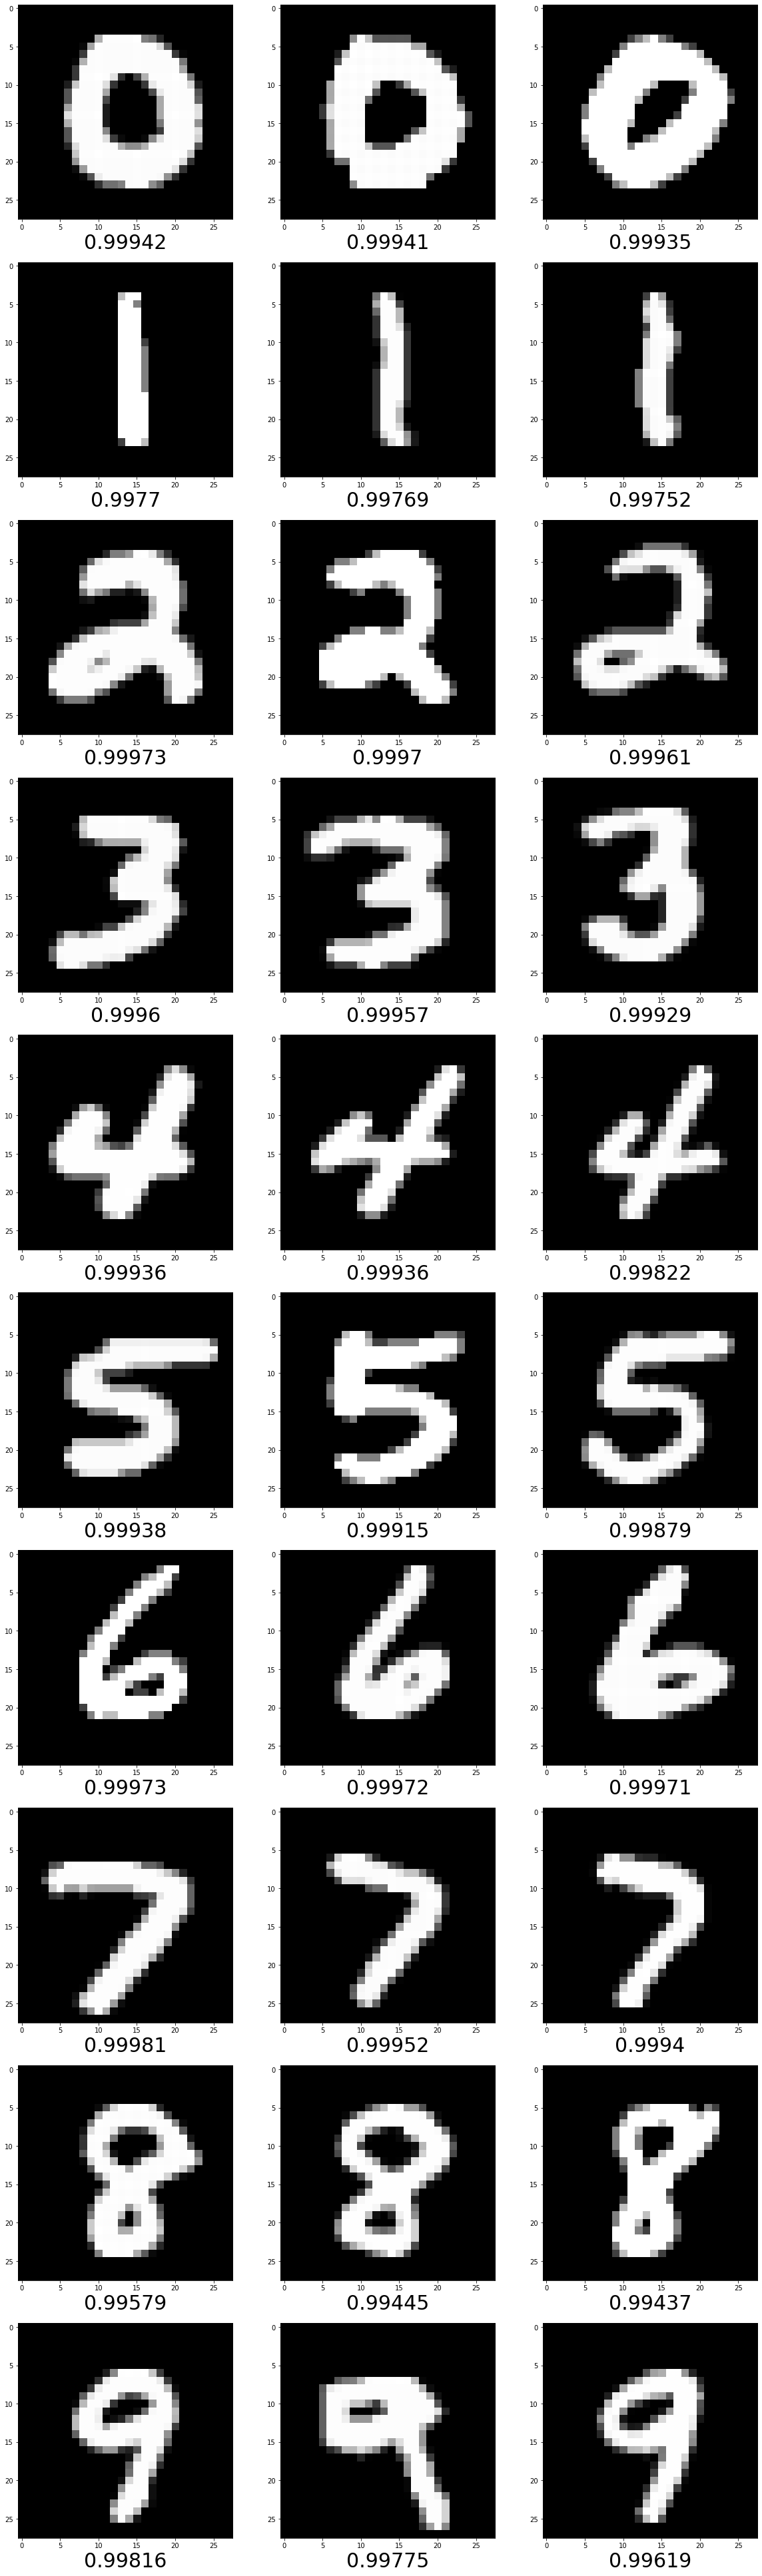

In [11]:
for i in range(10):
    top_3_values = top_3_dict[i]
    top_3_values
    for j in range(3):
        best_img = np.reshape(x_test[top_3_values[j][1]], (28, 28))
        plt.subplot(10, 3, 3*i + j+1)
        plt.imshow(best_img)
        plt.xlabel(round(top_3_values[j][0], 5), fontsize=30)
plt.show()

Text(69.0, 0.5, 'True label')

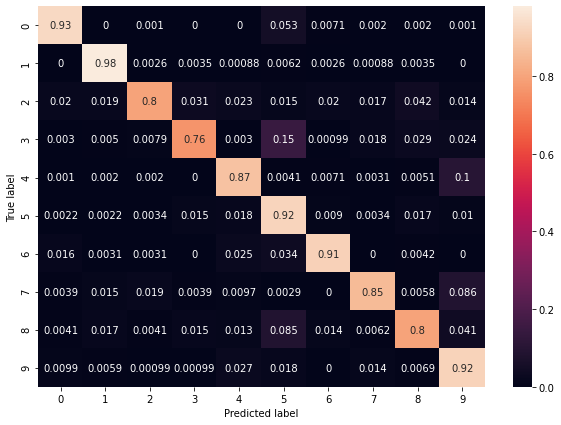

In [12]:
# confusion matrix
confusion = confusion_matrix(y_test, test_pred)
confusion = confusion.astype(np.float) / confusion.astype(np.float).sum(axis=1, keepdims=True)

df = pd.DataFrame(confusion, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [13]:
# training - leaky relu
np.random.seed(2)
net_2 = NeuralNet(input_size, layer_size, class_size, is_relu=False)
stats_2 = net_2.train(x, y, x_val, y_val, iters=300, batch_size=200, lr=1e-1, reg=1e-4)

iteration 0 / 300: loss 2.380573
iteration 10 / 300: loss 2.134048
iteration 20 / 300: loss 1.847184
iteration 30 / 300: loss 1.547171
iteration 40 / 300: loss 1.172278
iteration 50 / 300: loss 1.078184
iteration 60 / 300: loss 0.874451
iteration 70 / 300: loss 0.796422
iteration 80 / 300: loss 0.677856
iteration 90 / 300: loss 0.669387
iteration 100 / 300: loss 0.595604
iteration 110 / 300: loss 0.496341
iteration 120 / 300: loss 0.497082
iteration 130 / 300: loss 0.599740
iteration 140 / 300: loss 0.514084
iteration 150 / 300: loss 0.448994
iteration 160 / 300: loss 0.405208
iteration 170 / 300: loss 0.506298
iteration 180 / 300: loss 0.423190
iteration 190 / 300: loss 0.495534
iteration 200 / 300: loss 0.440720
iteration 210 / 300: loss 0.423697
iteration 220 / 300: loss 0.395024
iteration 230 / 300: loss 0.390522
iteration 240 / 300: loss 0.425728
iteration 250 / 300: loss 0.500204
iteration 260 / 300: loss 0.378331
iteration 270 / 300: loss 0.413340
iteration 280 / 300: loss 0.514

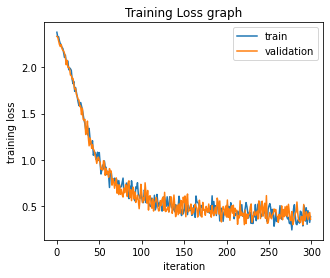

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots

train_loss, = plt.plot(stats_2['train_loss_graph'], label='train')
val_loss, = plt.plot(stats_2['val_loss_graph'], label='validation')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss graph')
plt.legend(handles=[train_loss, val_loss], loc='upper right')
plt.show()

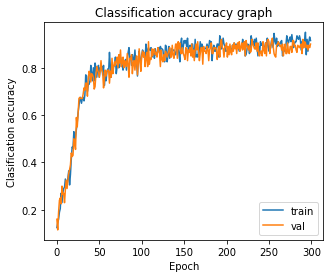

In [15]:
# test
test_pred, test_scores = net_2.predict(x_test)
train_acc, = plt.plot(stats_2['train_acc_graph'], label='train')
val_acc, = plt.plot(stats_2['val_acc_graph'], label='val')
plt.title('Classification accuracy graph')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(handles=[train_acc, val_acc], loc='lower right')
plt.show()

In [16]:
# test
test_pred_2, test_scores_2 = net_2.predict(x_test)

In [17]:
# plot top-3 images with probability

scores_dict = defaultdict(list)
for i in range(len(test_pred_2)):
    scores_dict[test_pred_2[i]].append((test_scores_2[i], i))

# print(scores_dict)

top_3_dict = defaultdict(list)
for key in scores_dict.keys():
    values = scores_dict[key]
    values.sort(key=lambda x: x[0], reverse=True)
    top_3_dict[key].extend(values[:3])

In [18]:
x_test.shape

(10000, 784)

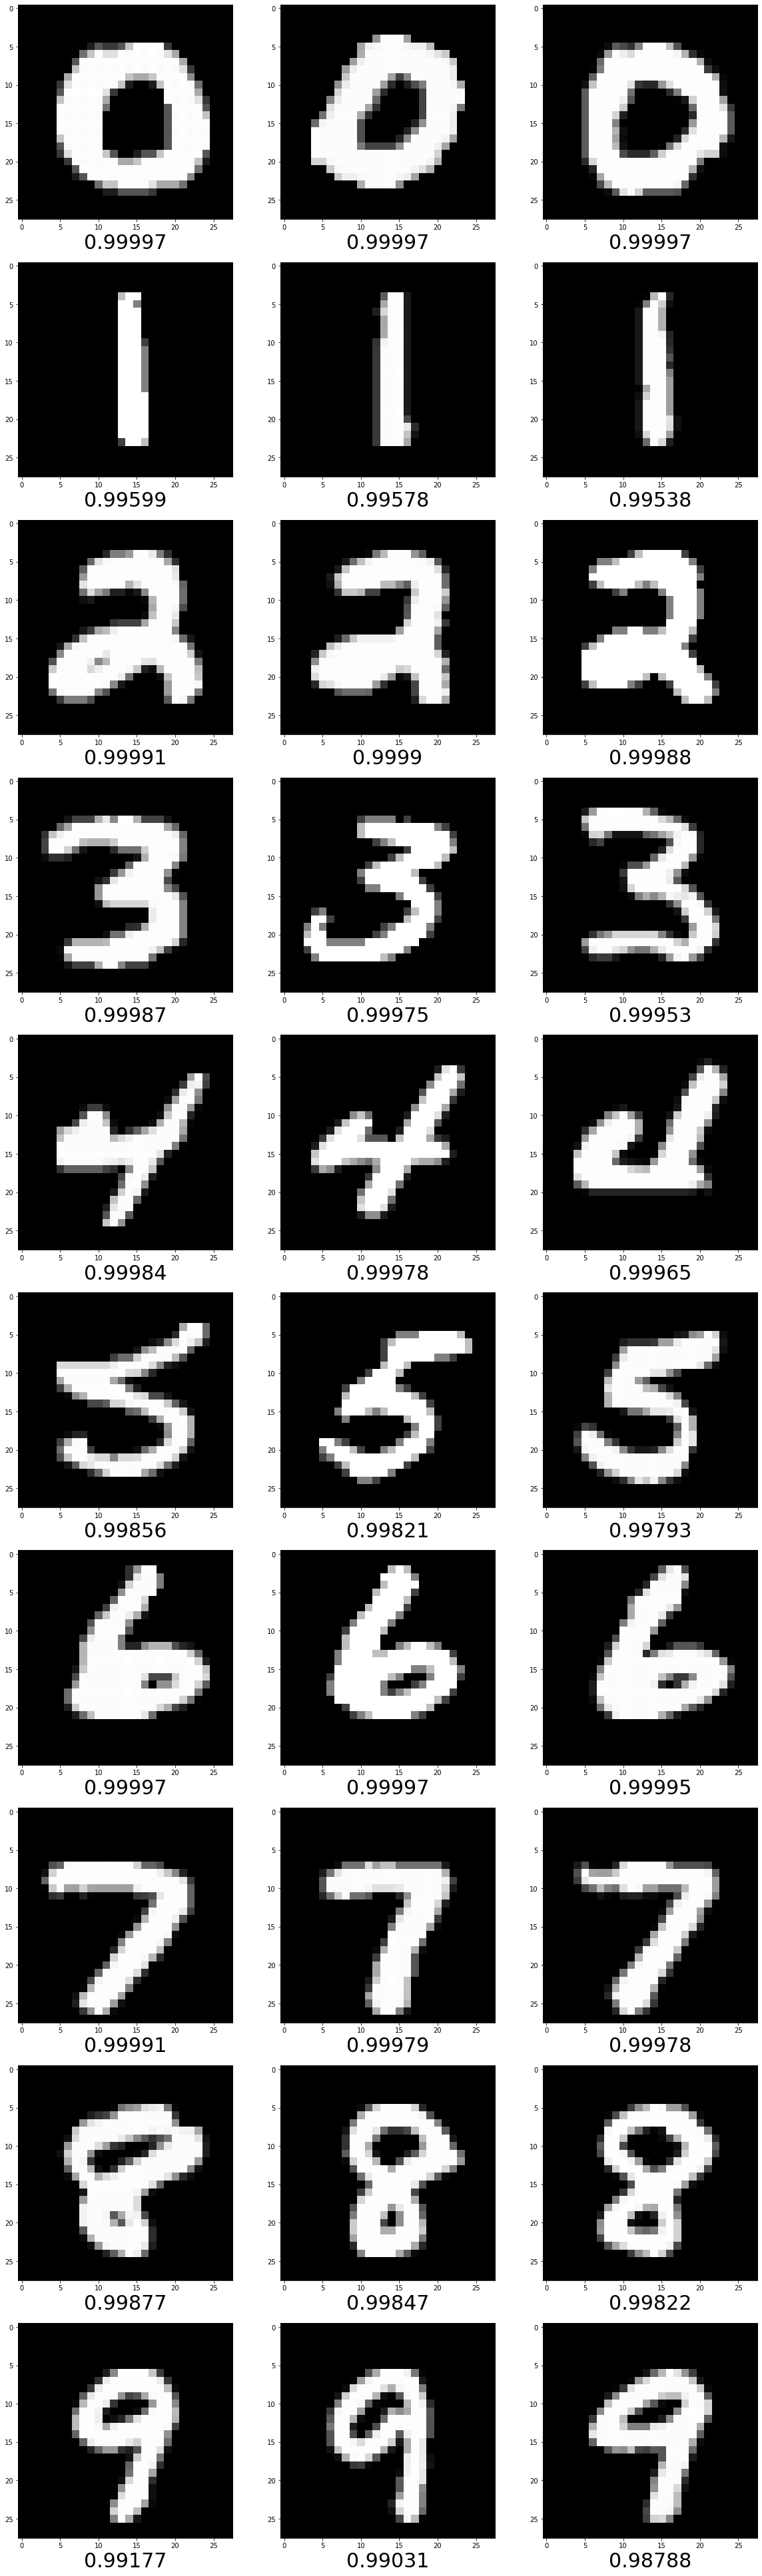

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 70.0) # set size of plots

for i in range(10):
    top_3_values = top_3_dict[i]
    top_3_values
    for j in range(3):
        best_img = np.reshape(x_test[top_3_values[j][1]], (28, 28))
        plt.subplot(10, 3, 3*i + j+1)
        plt.imshow(best_img)
        plt.xlabel(round(top_3_values[j][0], 5), fontsize=30)
plt.show()

Text(69.0, 0.5, 'True label')

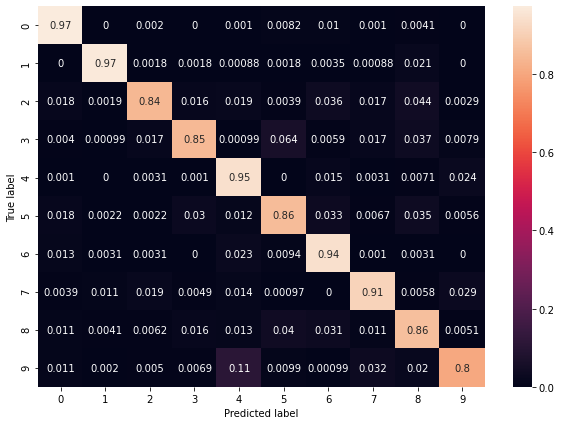

In [20]:
# confusion matrix
confusion = confusion_matrix(y_test, test_pred)
confusion = confusion.astype(np.float) / confusion.astype(np.float).sum(axis=1, keepdims=True)

df = pd.DataFrame(confusion, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")